## Creating Bigram dataset for training NN


In [1]:
import torch

In [2]:
words = open("names.txt", "r").read().splitlines()

In [135]:
chars = sorted(list(set("".join(words))))
str_to_int = {str: (int + 1) for int, str in enumerate(chars)}
str_to_int['.'] = 0
print(str_to_int)
int_to_str = {int: str for str, int in str_to_int.items()}
print(int_to_str)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [34]:
xs, ys = [], []
for w in words[:1]:
    w = ['.'] + list(w) + ['.']
    for c1, c2 in zip(w, w[1:]):
        ix1, ix2 = str_to_int[c1], str_to_int[c2]
        #print(c1, c2)
        xs.append(ix1)
        ys.append(ix2)

We can either use tensor() or Tensor(), the latter casts the type to float while torch.tensor() can let you specify your own data type which seems to be ideal!

In [35]:
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [36]:
print(xs, xs.shape)
print(ys, ys.shape)

tensor([ 0,  5, 13, 13,  1]) torch.Size([5])
tensor([ 5, 13, 13,  1,  0]) torch.Size([5])


### One hot encoding input vectors
We do this because feeding direct integers into NNs is considerably stupido and can lead to some weird internal math.

In [42]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float() # we feed in float ints as input due to decimals, num_classes is 27 because that's our vocab length
print(xenc, xenc.shape)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]]) torch.Size([5, 27])


torch.float32


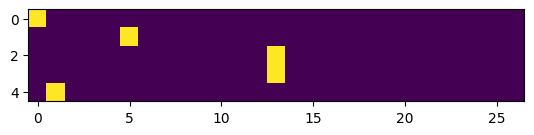

In [45]:
import matplotlib.pyplot as plt

plt.imshow(xenc) # shows active bits and their respective indices
print(xenc.dtype)

## Creating Linear layer of neurons

In [52]:
W = torch.randn((27, 1)) # creates a random array sampled from normal distribution
print(W.shape)

torch.Size([27, 1])


In [48]:
xenc @ W # (5, 27) @ (27, 1) -> (5, 1)

tensor([[-0.3187],
        [ 0.1267],
        [-0.4235],
        [-0.4235],
        [-1.3128]])

In [53]:
W = torch.randn((27, 27)) # creates a random array sampled from normal distribution
print(W.shape)
W

torch.Size([27, 27])


tensor([[-1.3223e+00,  2.6850e-01, -7.0959e-01, -1.2964e-01,  8.8928e-01,
         -1.6973e+00, -1.4297e+00,  7.4506e-01, -2.1140e+00,  6.5900e-01,
          9.8205e-01,  2.1172e-01,  2.5629e+00,  9.5920e-01,  1.9193e+00,
          9.9940e-02, -7.0862e-01,  4.7327e-01,  1.0120e+00, -1.0512e+00,
          9.3161e-01,  1.1303e-01,  1.0594e-01, -2.3912e-01,  1.1997e+00,
          3.1005e-02, -5.9222e-01],
        [ 6.3097e-01,  1.1864e+00,  6.1837e-01, -2.4345e-01,  2.8295e-01,
          2.2870e+00,  1.0538e+00, -2.4559e-01, -6.7456e-01,  6.5415e-01,
         -1.5692e-01,  1.9564e-01, -1.1862e+00, -1.2564e+00, -2.2682e+00,
          7.2464e-01, -3.6260e-01, -9.7481e-01, -1.1651e+00,  8.8844e-01,
         -3.3128e-01,  5.6318e-01, -2.8333e-01, -2.0064e-01, -9.5221e-02,
          5.0983e-01, -6.9077e-01],
        [ 4.3261e-01, -3.5901e-01, -1.9060e+00, -9.5987e-01,  2.7549e-01,
         -8.6135e-01, -1.7245e+00, -1.7481e+00, -1.4757e+00, -5.4727e-01,
          9.9468e-01, -6.7480e-02,  7.14

In [54]:
(xenc @ W)[4, 15]

tensor(0.7246)

## Transforming nn outputs to probabilities via Softmax!!
We need to do this since probabilities must be positive (check e^x's curve, it converts negative inputs to values close to 1 and > than 0) and must sum to be 1, which is what softmax does as it divides exponentiated logits by their sum.

In [66]:
logits = xenc @ W # log-counts are something the layers will output for any given input token, these are raw probabilities of sorts
counts = logits.exp() # we exponentiate these logits

In [ ]:
print(counts.shape)
counts.sum(1, keepdim=True).shape # get their sum

torch.Size([5, 27])
tensor([[ 0.8204,  0.9878,  0.9535,  0.7803,  0.7689,  0.6357,  2.9300,  1.3853,
          2.0951,  0.3244,  1.5304,  1.7534,  0.8221,  0.7291,  4.0443,  0.6918,
          1.3866,  0.5431,  0.9257,  0.6653,  2.5844,  1.1767,  0.2101,  0.3315,
          1.2495,  1.9644,  9.2042],
        [ 1.6278,  2.2958,  1.6263,  0.3658,  0.8130,  1.0424,  1.9860,  0.0937,
          0.2300,  0.4596,  1.2925,  0.1269,  1.1433,  1.1985,  1.5810,  0.3299,
          1.3016,  3.2315,  1.2960,  0.3366,  5.7013,  2.0790,  0.6898,  0.7049,
          0.3366,  1.1031,  0.6944],
        [ 1.6526,  0.2462,  0.7590,  1.3951,  0.3359,  1.3505,  0.3056,  0.6874,
          2.2737,  4.9265,  1.4372,  1.4624,  0.2609,  1.5020,  9.7843,  0.5984,
          2.3429,  0.5521,  0.8369,  0.6694,  0.8478,  1.8000,  2.2575,  0.3026,
          0.7246,  2.0228,  0.4211],
        [ 1.6526,  0.2462,  0.7590,  1.3951,  0.3359,  1.3505,  0.3056,  0.6874,
          2.2737,  4.9265,  1.4372,  1.4624,  0.2609,  1.50

torch.Size([5, 1])

In [72]:
prob = counts / counts.sum(1, keepdim=True) # softmax. kaboom, kapow.
print(prob)
prob.shape

tensor([[0.0198, 0.0238, 0.0230, 0.0188, 0.0185, 0.0153, 0.0706, 0.0334, 0.0505,
         0.0078, 0.0369, 0.0423, 0.0198, 0.0176, 0.0975, 0.0167, 0.0334, 0.0131,
         0.0223, 0.0160, 0.0623, 0.0284, 0.0051, 0.0080, 0.0301, 0.0473, 0.2218],
        [0.0483, 0.0682, 0.0483, 0.0109, 0.0241, 0.0309, 0.0590, 0.0028, 0.0068,
         0.0136, 0.0384, 0.0038, 0.0339, 0.0356, 0.0469, 0.0098, 0.0386, 0.0959,
         0.0385, 0.0100, 0.1692, 0.0617, 0.0205, 0.0209, 0.0100, 0.0327, 0.0206],
        [0.0396, 0.0059, 0.0182, 0.0334, 0.0080, 0.0323, 0.0073, 0.0165, 0.0545,
         0.1180, 0.0344, 0.0350, 0.0062, 0.0360, 0.2343, 0.0143, 0.0561, 0.0132,
         0.0200, 0.0160, 0.0203, 0.0431, 0.0541, 0.0072, 0.0174, 0.0484, 0.0101],
        [0.0396, 0.0059, 0.0182, 0.0334, 0.0080, 0.0323, 0.0073, 0.0165, 0.0545,
         0.1180, 0.0344, 0.0350, 0.0062, 0.0360, 0.2343, 0.0143, 0.0561, 0.0132,
         0.0200, 0.0160, 0.0203, 0.0431, 0.0541, 0.0072, 0.0174, 0.0484, 0.0101],
        [0.1026, 0.0799,

torch.Size([5, 27])

Currently the nn layer is still not quite a nn in full and probs tensor is still a probability matrix. We need hidden layers and non linearities to capture richer patterns. A loss function would be good to train a model as well!

## Implementing loss function at last!

In [ ]:
g = torch.Generator().manual_seed(25)
W = torch.randn((27, 27), generator=g, requires_grad=True) # need to enable requires_grad bcs we gonna backprop thru the n/w for loss

### Performing the forward pass!

In [100]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = (xenc @ W)
counts = logits.exp()
prob = counts / counts.sum(1, keepdim=True)

In [101]:
# if we want to index into probability for each particular token at a position after start token dot(.), manually it goes like this
prob[0, 5], prob[1, 13], prob[2, 13], prob[3, 1], prob[4, 0]

(tensor(0.0468, grad_fn=<SelectBackward0>),
 tensor(0.0365, grad_fn=<SelectBackward0>),
 tensor(0.0525, grad_fn=<SelectBackward0>),
 tensor(0.0371, grad_fn=<SelectBackward0>),
 tensor(0.0698, grad_fn=<SelectBackward0>))

In [102]:
# but a better way to do so it is by using torch.arange()
prob[torch.arange(5), ys]

tensor([0.0468, 0.0365, 0.0525, 0.0371, 0.0698], grad_fn=<IndexBackward0>)

In [103]:
# so, loss function is average of negative log likelihood
loss = -prob[torch.arange(5), ys].log().mean()
loss.item()

3.054914951324463

### Backward pass time!

In [98]:
W.grad = None # set gradients to zero before backpropagating each time!
loss.backward()

In [ ]:
W.data += -0.1 * W.grad # loss will go down if you run forward pass again!

## Summing it up

In [161]:
xs, ys = [], []
#for w in words[:5]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for c1, c2 in zip(chs, chs[1:]):
        ix1 = str_to_int[c1]
        ix2 = str_to_int[c2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print("Number of examples/bigrams: ", num)

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

Number of examples/bigrams:  228146


In [162]:
# Gradient based optimization goes here
for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = (xenc @ W)
    counts = logits.exp()
    prob = counts / counts.sum(1, keepdim=True)
    loss = -prob[torch.arange(num), ys].log().mean()
    print(f"{loss.item()}")
    
    # backward pass
    W.grad = None
    loss.backward()
    
    # update
    W.data += -50 * W.grad

3.758953809738159
3.371098756790161
3.1540417671203613
3.020373821258545
2.9277119636535645
2.860402822494507
2.8097293376922607
2.7701027393341064
2.7380733489990234
2.711496591567993
2.6890034675598145
2.6696884632110596
2.6529300212860107
2.638277292251587
2.6253881454467773
2.6139907836914062
2.603863477706909
2.5948219299316406
2.586712121963501
2.57940411567688
2.572789192199707
2.5667762756347656
2.5612881183624268
2.5562589168548584
2.551633596420288
2.547365665435791
2.5434155464172363
2.539748430252075
2.5363364219665527
2.5331544876098633
2.5301806926727295
2.5273969173431396
2.5247862339019775
2.522334575653076
2.520029067993164
2.517857789993286
2.515810966491699
2.513878345489502
2.512052059173584
2.510324001312256
2.5086867809295654
2.5071346759796143
2.5056610107421875
2.5042612552642822
2.502929210662842
2.5016613006591797
2.5004522800445557
2.4992990493774414
2.498197317123413
2.497144937515259
2.496137857437134
2.495173692703247
2.4942495822906494
2.493363380432129
2

## Sampling from nn

In [163]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float() # (1, 27)
        logits = xenc @ W
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdim=True) # fetch probability distribution for next character
        
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        out.append(int_to_str[ix])
        
        if ix == 0:
            break

    print("".join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.


### Notes
- One hot encoding essentially does the same as picking up the first character from our lookup table as the first row, so it picks a row from the linear layer of neurons- and then sums up the exponentiated logits across columns to produce a probability distribution!
- We can add regularization loss and use it as label smoothing as we did to prevent zero frequency bigrams from ruining the log likelihood by outputting infinite. Essentially has the same effect by pushing the weights closer to zero (add `beta*(W**2).mean()` to the loss to force model to optimize for two objectives. the lower the value of W, the lower the loss) and that leads to an even distribution of probabilities like what happens when we add values >10k to N during label smoothing.
- It's hard to maintain a lookup table for more combinations and after a certain number of dimensions for N-gram, it becomes impossible to maintain. So nns offer much more flexibility in that regard!